# Importing all necessary libraries

In [173]:
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.colors as pc
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, inconsistent
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Applying K Mean Cluster in 2D

## Generate dataset for clustering in 2D

In [69]:
# Generate synthetic data with 3 clusters
n_samples = 300
n_features = 2
n_clusters = 7
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

## Plot original dataset in 2D

In [70]:
# Create a Plotly scatter plot for the original data points
original_data = px.scatter(x=X[:, 0], y=X[:, 1], title="Original Data Points")
original_data.update_layout(xaxis_title="Feature 1", yaxis_title="Feature 2")
# Display the original data plot
original_data.show()

## Applying `k mean clustering` for `k=2`

In [49]:
# Applying k mean clustering for k = 3
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [50]:
# Get cluster assignments and cluster centers
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [51]:
print(cluster_assignments)

[1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 2 1 1 1 2 0 0 2 0 0 1 2
 1 2 1 2 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 2 0 0 1 1 0 1 1 0
 1 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 0 0 1 1 1 2 0 1 0 0 0 2 0 0 1 1 1 0 1 2 0
 1 1 0 0 1 2 0 0 1 1 1 2 1 0 0 0 0 0 1 1 1 0 0 0 2 0 2 1 1 0 0 0 0 2 0 0 1
 1 0 1 0 0 1 2 2 0 1 0 1 1 0 1 0 0 0 1 2 0 1 2 2 0 1 1 1 2 1 1 1 1 1 1 1 1
 2 0 1 1 0 2 2 0 1 0 0 0 2 1 0 0 2 0 0 0 0 0 2 1 1 2 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 2 1 1 0 1 0 1 1 0 1 1 0 0 1 2 0 1 2 1 1 1 1 1 2 0 1 0 0 1 1 1 0 1
 1 1 0 1 1 0 2 0 1 1 2 0 0 1 0 2 1 0 0 1 0 1 2 2 0 1 1 0 1 1 2 2 2 0 0 1 2
 1 2 0 0]


In [53]:
print(cluster_centers)

[[-7.0270522   8.46059566]
 [ 4.44529328  0.23571941]
 [-6.94453355 -6.82341966]]


In [66]:
# Create a Plotly scatter plot for data points with cluster assignments
clustered_data = px.scatter(x=X[:, 0], y=X[:, 1], color=cluster_assignments, title="K-means Clustering Results")
clustered_data.update_layout(xaxis_title="Feature 1", yaxis_title="Feature 2")


# Display the plots
clustered_data.show()

## Calculating WCSS and Apllying Elbow Method to find best valye of `k`

In [71]:
# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
max_k = 10  # Maximum number of clusters to try

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Create a Plotly line chart for the WCSS values
fig = go.Figure(data=go.Scatter(x=list(range(1, max_k + 1)), y=wcss, mode='lines+markers'))
fig.update_layout(title="Elbow Method for Optimal K",
                  xaxis_title="Number of Clusters (K)", yaxis_title="WCSS")
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

## Applying K Mean Clustering for optimal value of `k=5`

In [93]:
# Use the elbow point to determine the optimal value of k
optimal_k = 5  # Adjust this based on the elbow point in the chart

# Apply K-means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=random_state)
kmeans.fit(X)

# Get cluster assignments and cluster centers
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create a grid to evaluate model predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# Predict the cluster for each grid point
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a Plotly scatter plot for data points with cluster assignments
clustered_data = go.Figure()

for cluster_id in range(optimal_k):
    cluster_data = X[cluster_assignments == cluster_id]
    clustered_data.add_trace(go.Scatter(x=cluster_data[:, 0], y=cluster_data[:, 1],
                                        mode='markers', name=f'Cluster {cluster_id}', marker=dict(color=cluster_id)))

# Create a center of cluster
clustered_data.add_trace(go.Scatter(x=cluster_centers[:, 0], y=cluster_centers[:, 1],
                                    mode='markers', marker=dict(size=12, symbol='x', color='black'),
                                    name='Cluster Centers'))
# Add contour plot to show cluster boundaries
clustered_data.add_trace(go.Contour(x=xx[0], y=yy[:, 0], z=Z, colorscale='Viridis', showscale=False,
                                    opacity=0.3))

clustered_data.update_layout(title=f"K-means Clustering Results (K = {optimal_k})",
                             xaxis_title="Feature 1", yaxis_title="Feature 2")
clustered_data.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Applying K Mean Clustering in 3D

## Generate the cluster dataset and plot the data in 3D

In [102]:
# Generate synthetic data with 4 clusters in 3D space
n_samples = 300
n_features = 3
n_clusters = 6
random_state = 45

data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Create a 3D scatter plot for the data
scatter_data = go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2],
                            mode='markers', marker=dict(size=3),
                            name='Data Points')

layout = go.Layout(title="3D Data Points", showlegend=True,
                   scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"))

# Create the figure
fig = go.Figure(data=[scatter_data], layout=layout)
fig.show()

## Calculate WCSS and Plot Elbow Figure

In [103]:
# Calculate the sum of squared distances for different values of k
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)

# Create an elbow graph to visualize the sum of squared distances
elbow_graph = go.Figure()
elbow_graph.add_trace(go.Scatter(x=list(range(1, 11)), y=WCSS, mode='lines+markers'))

elbow_graph.update_layout(title="Elbow Method for Optimal k",
                          xaxis_title="Number of Clusters (k)",
                          yaxis_title="Sum of Squared Distances (SSE)")

elbow_graph.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

## Best Value of k is `7` : Identified from Elbow Chart
## Plot K mean clustering for `k=6`

In [111]:
# Apply K-means clustering with k=6
n_clusters_kmeans = 6
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=random_state)
cluster_assignments = kmeans.fit_predict(data)
cluster_centers = kmeans.cluster_centers_

# Create a 3D scatter plot for clusters with boundaries
scatter_data = []

for cluster_id in range(n_clusters_kmeans):
    cluster_data = data[cluster_assignments == cluster_id]
    scatter_data.append(go.Scatter3d(x=cluster_data[:, 0], y=cluster_data[:, 1], z=cluster_data[:, 2],
                                      mode='markers', marker=dict(size=3),
                                      name=f'Cluster {cluster_id}'))

# Add cluster center markers
scatter_data.append(go.Scatter3d(x=cluster_centers[:, 0], y=cluster_centers[:, 1], z=cluster_centers[:, 2],
                                  mode='markers', marker=dict(size=6, symbol='x', color='black'),
                                  name='Cluster Centers'))

layout = go.Layout(title="K-means Clustering Results in 3D",
                   scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"))

# Create the figure
fig = go.Figure(data=scatter_data, layout=layout)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Performing `Silhouette Analysis`

In [117]:
# Create a list to store silhouette scores for different k values
silhouette_scores = []

# Perform silhouette analysis for different k values
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    cluster_assignments = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

# Create a silhouette score graph
silhouette_graph = go.Figure()
silhouette_graph.add_trace(go.Scatter(x=list(range(2, 11)), y=silhouette_scores, mode='lines+markers'))

silhouette_graph.update_layout(title="Silhouette Analysis for Different k Values",
                               xaxis_title="Number of Clusters (k)",
                               yaxis_title="Average Silhouette Score")

silhouette_graph.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

# Agglomerative Clustering

In [127]:
# Generate synthetic data with 2D features
n_samples = 300
n_features = 2
random_state = 42
no_cluster = 7

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=no_cluster, random_state=random_state)

# Apply Agglomerative Clustering
n_clusters = 7
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative_clustering.fit_predict(X)

# Create a Plotly scatter plot for data points with cluster assignments
clustered_data = px.scatter(x=X[:, 0], y=X[:, 1], color=cluster_labels, title="Agglomerative Clustering")
clustered_data.update_layout(xaxis_title="Feature 1", yaxis_title="Feature 2")

# Display the plot
clustered_data.show()

## Silhouette Analysis for Agglomerative Clustering

In [128]:
# Range of k values to consider
range_n_clusters = range(2, 11)

# Calculate silhouette scores for different k values
silhouette_scores = []

for n_clusters in range_n_clusters:
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create a line plot of silhouette scores
line_plot = go.Figure()
line_plot.add_trace(go.Scatter(x=list(range_n_clusters), y=silhouette_scores, mode='lines+markers'))

line_plot.update_layout(title="Silhouette Analysis for Agglomerative Clustering",
                        xaxis_title="Number of Clusters (k)",
                        yaxis_title="Average Silhouette Score")

line_plot.show()

## Agglomerative Clustering for `K=5`

In [140]:
# Apply Agglomerative Clustering for k = 5
n_clusters = 5
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative_clustering.fit_predict(X)

# Create a Plotly scatter plot for data points with cluster assignments
clustered_data = px.scatter(x=X[:, 0], y=X[:, 1], color=cluster_labels, title="Agglomerative Clustering")
clustered_data.update_layout(xaxis_title="Feature 1", yaxis_title="Feature 2")

# Display the plot
clustered_data.show()

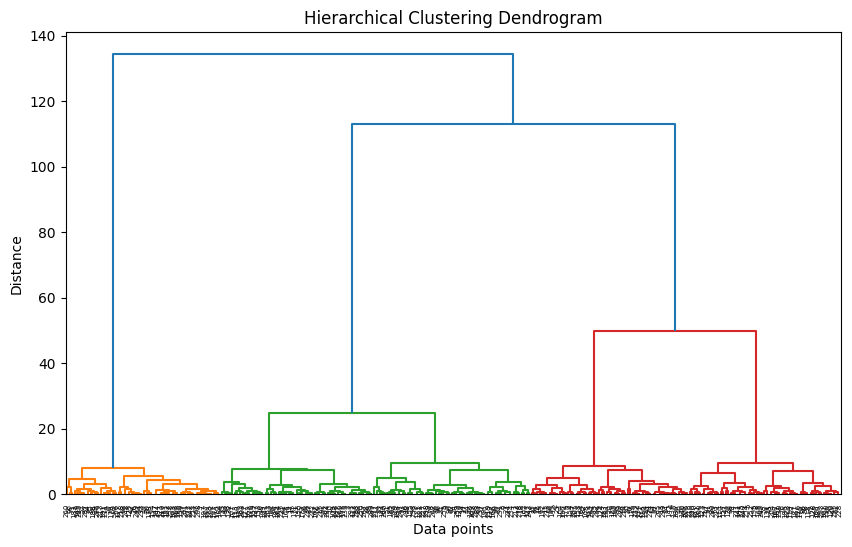

In [142]:
# Calculate linkage matrix
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

## DBSCAN in 2d Moon Shape Data

In [174]:
# Generate moon-shaped synthetic data
n_samples = 500
X, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=40)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

# Create a Plotly scatter plot for clustered data
clustered_data = px.scatter(x=X[:, 0], y=X[:, 1], color=cluster_labels, title="DBSCAN Clustering")
clustered_data.update_layout(xaxis_title="Feature 1", yaxis_title="Feature 2")

# Display the plot
clustered_data.show()

# DBSCAN 3D Moon Shape Data

In [187]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped synthetic data in 3D
n_samples = 300
X, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=101)
z = np.random.rand(n_samples)  # Generate random z values for the third dimension

# Combine X and z to create 3D data
X_3d = np.column_stack((X, z))

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster_labels = dbscan.fit_predict(X_3d)

# Create a Plotly 3D scatter plot for clustered data
fig = go.Figure(data=[go.Scatter3d(
    x=X_3d[:, 0],
    y=X_3d[:, 1],
    z=X_3d[:, 2],
    mode='markers',
    marker=dict(color=cluster_labels, size=6),
)])

fig.update_layout(title="DBSCAN Clustering on Moon-Shaped Data in 3D")
fig.show()